In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.svm import SVR

from sklearn.metrics import r2_score as r2, mean_squared_error as mse

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Данный параметр установлен False, чтобы обойти скрипты, выполняющиеся десятки минут. 
# Чтобы провести полное выполнение, поставьте True
DoHeavyRoutines = False

In [3]:
import datetime

print(datetime.datetime.now())

2019-03-21 20:25:07.026478


In [4]:
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100

## Загрузка данных

In [5]:
df_train = pd.read_csv('input/train.csv')
df_test = pd.read_csv('input/test.csv')

## Предварительная подготовка

#### df_train

In [6]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [7]:
df_train.loc[(df_train['HouseYear'] > 2020) | (df_train['HouseFloor'] > 50) | (df_train['Rooms'] > 5)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.115515
8599,9300,74,2.0,71.747869,74.579809,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243329.912579
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863
8854,78,30,2.0,65.773749,66.811789,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.370520


In [8]:
# Корректировка года постройки 20052011 и 4968:
df_train.loc[[1497, 4189],['HouseYear']] = [2008, 1968]
# Корректировка этажности 99 и 117:
df_train.loc[[6131, 8599, 8854],['HouseFloor']] = [9, 9, 17]
# Корректировка Rooms 19, 10, 6:
df_train.loc[[377, 1454, 2170, 8849],['Rooms']] = [2, 1, 2, 3]

#### df_test

In [9]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [10]:
df_test.loc[(df_train['HouseYear'] > 2020) | (df_test['HouseFloor'] > 50) | (df_test['Rooms'] > 5)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
651,15864,27,3.0,47.722835,47.098813,9.0,18,99.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
2071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,B,B,2,475,0,NaN,0,0,B
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,NaN,1,4,B
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


In [11]:
# Изменение неадекватных значений для этажа / этажности:
df_test.loc[[651],['HouseFloor','Floor']] = [9, 8]
# Изменение Rooms=17,  6-комнатки считаем адекватными:
df_test.loc[[3398],['Rooms']] = [2]

#### Оцифровка текстовых полей:

In [12]:
df_train['Shops_2int'] = (df_train['Shops_2'] == 'B').astype(int)
df_train['Ecology_2int'] = (df_train['Ecology_2'] == 'B').astype(int)
df_train['Ecology_3int'] = (df_train['Ecology_3'] == 'B').astype(int)
df_train['Healthcare_1'] = df_train['Healthcare_1'].fillna(0)

df_test['Shops_2int'] = (df_test['Shops_2'] == 'B').astype(int)
df_test['Ecology_2int'] = (df_test['Ecology_2'] == 'B').astype(int)
df_test['Ecology_3int'] = (df_test['Ecology_3'] == 'B').astype(int)
df_test['Healthcare_1'] = df_test['Healthcare_1'].fillna(0)

## Train - Validation split

In [13]:
train, valid = train_test_split(df_train, test_size=0.3, random_state=70)

In [14]:
train.shape, valid.shape

((7000, 23), (3000, 23))

## Создание дополнительных характеристик

In [15]:
# Вычисляем стоимость квадратного метра на train
train['Price_m2']=(train['Price']/train['Square'])

In [16]:
train['Price_m2'].describe()

count      7000.000000
mean       3961.610672
std        3651.893029
min         208.293451
25%        2922.326722
50%        3904.110519
75%        4689.536731
max      230463.537966
Name: Price_m2, dtype: float64

In [17]:
train['Price_m2'].quantile(0.001), train['Price_m2'].quantile(0.999)

(1016.724963075884, 11328.470445180323)

In [18]:
# Таким образом явные выбросы по дополнительной характеристике "Стоимость m^2" крайне немногочисленны. 
# Оставим их как есть. Основная масса квартир имеет Price_m2 между $1000 и 10000. 

In [19]:
# Формируем массивы ключей для анализа стоимости и создания дополнительных характеристик:
keys = [['DistrictId'],['HouseYear'],['HouseFloor']]
key_prefix = ['D_', 'HY_', 'HF_'] # префикс для названия поля по ключу

In [20]:
# Создаем поле с группой (бины) по цене кв.метра по квантилям 10, 20, 30, ..., 100%:
nbin = 10
train['PriceGroup'] = pd.DataFrame(pd.qcut(train['Price_m2'], nbin, labels=range(1, nbin+1)))

In [21]:
def PivotMerge4key(km, prfx, n, train, test):
    # счетчик квартир в каждой группе по цене м^2, создает доп поле для каждой группы с префиксом prfx, 
    # соответствующим ключу km. n - количество бинов. 
    # Вычисленные на train дополнительные поля добавляет к test, используя ключ km
    # Если доп.поля уже созданы, то процедура не выполняется

    if prfx + '1' in train.columns:
        return
    
    # На основе данных train создаем новые поля в train:
    table = pd.pivot_table(train, values='Square', index=km, columns=['PriceGroup'], 
                       aggfunc=np.count_nonzero, fill_value=0).add_prefix(prfx)

    table['s'] = 0
    for k in range (1, n+1):
        fld_name = prfx + str(k)
        table['s'] = table['s'] + table[fld_name]
        
    for i in range(1, n+1):
        # нормирование сигнатуры по строке
        fld_name = prfx + str(i)
        table[fld_name] = table[fld_name] / table['s']
    table = table.drop(['s'], axis=1)
    
    train = train.merge(table, on=km, how='left')

    # теперь добавляем новые поля по ключу km к test (используем только ключ km). Недостающие ключи заполняем 0:
    test = test.merge(table, on=km, how='left')
    test = test.fillna(0)

    return train, test

In [22]:
def FormFeatsList(nbin):
    # формирует массив признаков для модели
    base = ['Rooms', 'Square', 'KitchenSquare','Floor', 'HouseFloor', 'HouseYear', 
         'Ecology_1', 'Ecology_2int','Ecology_3int', 'Social_1', 'Social_2', 'Social_3', 
         'Healthcare_1','Helthcare_2', 'Shops_1', 'Shops_2int'] 
    global key_prefix
    for prfx in key_prefix:
        for i in range(1, nbin+1):
            base.append(prfx + str(i))
    return base

##### Формирование доп. полей и добавление их к списку фич (основной цикл):

In [23]:
for ind, key in enumerate(keys):
    train, valid = PivotMerge4key(key, key_prefix[ind], nbin, train, valid)
feats = FormFeatsList(nbin) 

In [24]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Shops_2int,Ecology_2int,Ecology_3int,Price_m2,PriceGroup,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_10,HY_1,HY_2,HY_3,HY_4,HY_5,HY_6,HY_7,HY_8,HY_9,HY_10,HF_1,HF_2,HF_3,HF_4,HF_5,HF_6,HF_7,HF_8,HF_9,HF_10
count,7000.000000,7000.000000,7000.000000,7000.000000,5518.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,8394.367857,50.302714,1.890571,56.387030,36.270286,5.904571,8.562857,12.601429,1984.962143,0.120148,24.706714,5368.865286,7.760286,592.115000,1.305857,4.194429,214232.594611,0.917714,0.991429,0.973571,3961.610672,5.500000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
std,4874.859331,43.226966,0.813883,20.939094,20.452347,5.189429,5.244859,6.587536,18.331904,0.119605,17.541170,4012.105677,23.238447,927.074083,1.488738,4.762578,93613.519064,0.274819,0.092191,0.160418,3651.893029,2.872487,0.135892,0.124940,0.129234,0.110698,0.091763,0.092743,0.093990,0.098274,0.117186,0.175427,0.076417,0.101445,0.097664,0.053243,0.045315,0.068052,0.072933,0.069052,0.064986,0.079920,0.097088,0.077933,0.086231,0.053088,0.037944,0.055548,0.053800,0.051187,0.055299,0.069143
min,0.000000,0.000000,0.000000,1.136859,0.795539,0.000000,1.000000,0.000000,1912.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,208.293451,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4170.750000,20.000000,1.000000,41.804946,22.796821,1.000000,4.000000,9.000000,1974.000000,0.019509,6.000000,1564.000000,0.000000,0.000000,0.000000,1.000000,153433.827646,1.000000,1.000000,1.000000,2922.326722,3.000000,0.016173,0.000000,0.000000,0.012658,0.029412,0.027961,0.013245,0.003289,0.000000,0.003289,0.029412,0.013333,0.013514,0.058252,0.074547,0.026624,0.021299,0.023429,0.031949,0.030351,0.058524,0.029112,0.024745,0.060545,0.078125,0.061050,0.058608,0.058608,0.049451,0.072039
50%,8397.000000,36.000000,2.000000,52.665690,32.769898,6.000000,7.000000,13.000000,1977.000000,0.075601,25.000000,5285.000000,2.000000,30.000000,1.000000,3.000000,192317.727755,1.000000,1.000000,1.000000,3904.110519,5.500000,0.047619,0.035294,0.027027,0.061538,0.070175,0.056000,0.083333,0.105263,0.062500,0.012821,0.064516,0.028571,0.039216,0.091346,0.081081,0.107692,0.100000,0.096774,0.095238,0.085106,0.088799,0.053548,0.052392,0.106838,0.087179,0.109375,0.117188,0.115385,0.116173,0.086560
75%,12664.250000,75.000000,2.000000,65.835541,45.137721,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7287.000000,5.000000,990.000000,2.000000,6.000000,249241.451376,1.000000,1.000000,1.000000,4689.536731,8.000000,0.111111,0.185430,0.216630,0.141447,0.166667,0.171429,0.173913,0.181818,0.167453,0.111111,0.165069,0.231097,0.228967,0.166667,0.127273,0.159091,0.157895,0.158730,0.146552,0.135135,0.089744,0.188034,0.195971,0.143468,0.125837,0.143290,0.143240,0.141230,0.137500,0.104945
max,16798.000000,208.000000,5.000000,641.065193,638.1631

In [25]:
valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Shops_2int,Ecology_2int,Ecology_3int,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_10,HY_1,HY_2,HY_3,HY_4,HY_5,HY_6,HY_7,HY_8,HY_9,HY_10,HF_1,HF_2,HF_3,HF_4,HF_5,HF_6,HF_7,HF_8,HF_9,HF_10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8357.834000,50.629667,1.878000,56.149514,31.084721,7.133667,8.442333,12.534667,1984.641667,0.115847,24.641000,5313.172333,8.690000,600.194667,1.351333,4.317333,213920.137236,0.917000,0.987667,0.970000,0.102028,0.097712,0.096787,0.098163,0.099032,0.099962,0.102103,0.101441,0.098968,0.101137,0.097926,0.099209,0.097688,0.098392,0.100416,0.101202,0.101323,0.101347,0.101275,0.099556,0.097667,0.098896,0.099104,0.099272,0.101468,0.101502,0.101987,0.101157,0.099638,0.098642
std,4822.568207,44.424112,0.810762,21.337871,137.985529,51.534594,5.232380,6.573016,18.598259,0.117627,17.515471,3994.787860,25.154154,943.897241,1.504655,4.906661,91134.391056,0.275928,0.110387,0.170616,0.140481,0.123338,0.126659,0.112561,0.093179,0.094623,0.098705,0.103379,0.117451,0.177036,0.079428,0.101954,0.098115,0.052759,0.047069,0.069744,0.074369,0.069611,0.065579,0.075154,0.094154,0.076857,0.085954,0.048706,0.037182,0.055393,0.055561,0.050972,0.051767,0.066893
min,2.000000,0.000000,0.000000,2.954309,0.000000,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,60502.583500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4157.000000,19.000000,1.000000,41.724337,17.751451,1.000000,4.000000,9.000000,1973.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,0.000000,1.000000,155527.113564,1.000000,1.000000,1.000000,0.016173,0.000000,0.000000,0.012658,0.028571,0.027961,0.013245,0.003289,0.000000,0.003289,0.029126,0.010526,0.013333,0.054054,0.074547,0.026624,0.021299,0.023429,0.031949,0.030351,0.058524,0.029112,0.024745,0.060545,0.078125,0.061050,0.058608,0.058608,0.049451,0.072039
50%,8388.500000,35.000000,2.000000,52.206993,29.022338,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,30.000000,1.000000,3.000000,192230.205795,1.000000,1.000000,1.000000,0.047880,0.035294,0.025000,0.058824,0.071429,0.056000,0.083333,0.105263,0.062500,0.013889,0.057143,0.028571,0.035714,0.091346,0.081081,0.107692,0.100000,0.100000,0.096774,0.086207,0.088799,0.053548,0.052392,0.065596,0.087179,0.109415,0.117188,0.117647,0.116173,0.086560
75%,12373.500000,74.250000,2.000000,66.136800,41.398867,9.000000,12.000000,17.000000,2000.000000,0.190210,35.000000,7077.000000,5.000000,1015.000000,3.000000,6.000000,249116.513046,1.000000,1.000000,1.000000,0.111111,0.185430,0.216630,0.141447,0.166667,0.173913,0.176471,0.181818,0.166667,0.101266,0.165069,0.231097,0.228967,0.166667,0.127660,0.157895,0.161290,0.161538,0.147059,0.135135,0.089744,0.188034,0.195971,0.143468,0.125837,0.143290,0.150353,0.141230,0.129549,0.104945
max,16781.000000,209.000000,5.000000,604.705972,7480.592129,2014.000000,31.000000,45.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,624008.535763,1.000000,1.000000,1.000000,0.5

In [26]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2int,Ecology_2int,Ecology_3int
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.907000,56.449500,36.158810,5.976800,8.630000,12.583000,1984.392600,0.119874,24.933800,5406.900000,8.262600,601.536400,1.31940,4.242800,0.917600,0.990400,0.970200
std,4832.674037,44.179466,0.810976,19.092787,17.825287,9.950018,5.481634,6.678505,18.573149,0.120070,17.532202,4026.614773,23.863762,948.929796,1.47994,4.777365,0.275001,0.097518,0.170052
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,30.000000,1.00000,3.000000,1.000000,1.000000,1.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,1.000000,1.000000,1.000000
max,16795.000000,212.000000,6.000000,223.453689,303.071094,620.000000,78.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,1.000000,1.000000


## Подбор оптимального состава признаков для модели ("жадный" алгоритм)

In [27]:
def eval_RF(trn, tst, feats, n_est=176, mx_d=17, rnd_st=70):
    # Оценка метрик модели 
    model = RF(n_estimators=n_est, max_depth=mx_d, random_state=rnd_st)
    model.fit(trn[feats], trn['Price'])
    
    pred_trn = model.predict(trn.loc[:, feats])
    r2_trn = r2(trn['Price'], pred_trn)
    
    pred_tst = model.predict(tst.loc[:, feats])
    r2_tst = r2(tst['Price'], pred_tst)
    
    return r2_trn, r2_tst   

In [28]:
if DoHeavyRoutines:
# Внимание! Поиск оптимального состава признаков. Выполняется несколько десятков минут ...
    sfeat = []
    r2v=0
    feat_count=0
    while feats and feat_count<20:
        best_feat = ''
        for i, feat in enumerate(feats):
            featstst = sfeat + [feat]

            r2_train, r2_valid = eval_RF(train, valid, featstst)

            if r2_valid > r2v:
                r2v = r2_valid
                best_feat = feat
                ind = i
                print('best_feat:', best_feat, ' r2:', r2v)

        if best_feat:
            sfeat += [best_feat]
        else:
            break
        feats = feats[:ind] + feats[ind+1 :]
        print(r2v, sfeat)
        feat_count += 1
        print('---------------',feat_count,'---------------')

    greedy_complete = True    
    sfeat, r2v

best_feat: Rooms  r2: 0.32609433359769646
0.32609433359769646 ['Rooms']
--------------- 1 ---------------
best_feat: KitchenSquare  r2: 0.4033808530927042
best_feat: Ecology_1  r2: 0.5448158401587437
best_feat: Social_2  r2: 0.5493508593000076
best_feat: D_5  r2: 0.5498230001523365
0.5498230001523365 ['Rooms', 'D_5']
--------------- 2 ---------------
best_feat: Square  r2: 0.6130537033100965
0.6130537033100965 ['Rooms', 'D_5', 'Square']
--------------- 3 ---------------
best_feat: KitchenSquare  r2: 0.6477259771952419
best_feat: HouseFloor  r2: 0.6490982068940043
best_feat: HouseYear  r2: 0.6767040693572361
best_feat: D_10  r2: 0.6796102234161047
0.6796102234161047 ['Rooms', 'D_5', 'Square', 'D_10']
--------------- 4 ---------------
best_feat: KitchenSquare  r2: 0.7107641291843099
best_feat: HouseYear  r2: 0.7255013096804015
0.7255013096804015 ['Rooms', 'D_5', 'Square', 'D_10', 'HouseYear']
--------------- 5 ---------------
best_feat: KitchenSquare  r2: 0.7399378308807645
best_feat: So

##### Итак, выбрана модель:

In [29]:
# 0.7687  ['Rooms', 'D_5', 'Square', 'D_10', 'HouseYear', 'Social_2', 'HF_6', 'HY_2', 'KitchenSquare', 
# 'Healthcare_1', 'Floor', 'Ecology_1', 'Social_1', 'HF_7', 'HY_1', 'HY_7']
if DoHeavyRoutines:
    feats = sfeat
else:
    feats = ['Rooms', 'D_5', 'Square', 'D_10', 'HouseYear', 'Social_2', 'HF_6', 'HY_2', 'KitchenSquare',
             'Healthcare_1', 'Floor', 'Ecology_1', 'Social_1', 'HF_7', 'HY_1', 'HY_7']
feats

['Rooms',
 'D_5',
 'Square',
 'D_10',
 'HouseYear',
 'Social_2',
 'HF_6',
 'HY_2',
 'KitchenSquare',
 'Healthcare_1',
 'Floor',
 'Ecology_1',
 'Social_1',
 'HF_7',
 'HY_1',
 'HY_7']

In [30]:
# Еще раз подтверждаем достигнутый результат:
r2_train, r2_valid = eval_RF(train, valid, feats)
r2_train, r2_valid

(0.9609120859141002, 0.7687761045112207)

###### Достигнут результат R2=76,88%

## Анализ поведения модели

In [31]:
def TakePartOfDf(p):
    # получить p-долю основного датафрейма df_train
    if p < 1:
        xx, df_temp = train_test_split(df_train, test_size=p, random_state=42)
    else:
        df_temp = df_train.copy()
    return df_temp

In [32]:
if DoHeavyRoutines:
    # Подождите несколько минут ...
    # Из исходного df_train создает датафреймы размером от 200 до 10000 строк и проводим по ним оценку 
    # R2 для train и valid 
    a = []
    for i in range(200, 10001, 200):
        df_temp = TakePartOfDf(i/10000)
        tr_tmp, vl_tmp = train_test_split(df_temp, test_size=0.3, random_state=70) 

        tr_tmp['Price_m2']=(tr_tmp['Price']/tr_tmp['Square'])
        tr_tmp['PriceGroup'] = pd.DataFrame(pd.qcut(tr_tmp['Price_m2'], nbin, labels=range(1, nbin+1)))

        for ind, key in enumerate(keys):
            tr_tmp, vl_tmp = PivotMerge4key(key, key_prefix[ind], nbin, tr_tmp, vl_tmp)

        r2_tr_tmp, r2_vl_tmp = eval_RF(tr_tmp, vl_tmp, feats, rnd_st=None) 

        a.append([r2_tr_tmp, r2_vl_tmp])

    np.array(a).transpose()

In [33]:
if not DoHeavyRoutines:
    a = np.array([[0.95048549, 0.94656192, 0.95596219, 0.96427673, 0.9580986 ,
        0.95738607, 0.96327128, 0.96014107, 0.95854162, 0.96194421,
        0.95942764, 0.9592587 , 0.96608844, 0.96552656, 0.96574939,
        0.96735438, 0.96621499, 0.967057  , 0.96591493, 0.96540383,
        0.96410139, 0.96376464, 0.96235271, 0.96188932, 0.96031298,
        0.96180769, 0.96060622, 0.96307887, 0.96350969, 0.96194904,
        0.96145163, 0.96275771, 0.96224927, 0.95991651, 0.96176225,
        0.96270439, 0.96229685, 0.96289353, 0.96095605, 0.9623731 ,
        0.96123634, 0.95946357, 0.9611593 , 0.96240801, 0.96244501,
        0.96211936, 0.96373606, 0.96222314, 0.96276678, 0.96091209],
       [0.50605379, 0.4782697 , 0.45122876, 0.45046579, 0.57394011,
        0.59712336, 0.5589848 , 0.61336326, 0.62597415, 0.56910573,
        0.56166041, 0.64350663, 0.62340876, 0.57004554, 0.61298892,
        0.59346901, 0.5860487 , 0.59826592, 0.5810889 , 0.63092803,
        0.63459217, 0.6700309 , 0.71144224, 0.71453763, 0.71683726,
        0.71625639, 0.70407563, 0.69157945, 0.70107847, 0.70894777,
        0.714234  , 0.70694025, 0.69869094, 0.7197093 , 0.68563476,
        0.67684791, 0.71258185, 0.71296734, 0.72341639, 0.73503434,
        0.74311055, 0.74570347, 0.73084351, 0.71773958, 0.73748525,
        0.7526078 , 0.73765986, 0.75094009, 0.74790916, 0.7687761 ]]).transpose()

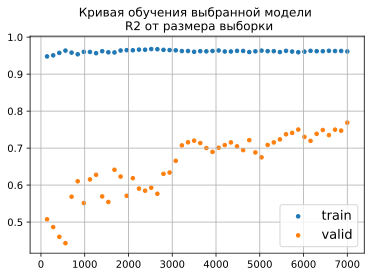

In [34]:
g1 = plt.scatter(range(140,7001,140),np.array(a)[:,0], s=13, label='train') 
g2 = plt.scatter(range(140,7001,140),np.array(a)[:,1], s=13, label='valid') 
plt.title('Кривая обучения выбранной модели \n R2 от размера выборки')
plt.legend((g1, g2),('train', 'valid'),fontsize=13)
plt.grid(True)

plt.show()

### Вывод: Для снижения зависимости от случайного выбора в алгоритме анализа модель инициируется случайно на каждом шаге. Выбранная модель показывает рост значений для validation set примерно до 74-77%, и относительно стабильное поведение на train около 96% c незначительным уклоном вниз, что говорит о снижении переобучения с ростом размера выборки. Добавление новых наблюдений может увеличить точность модели

#### Вычислим возможный выигрыш качества при увеличении размера выборки от 7000 до 10000 тысяч наблюдений

In [35]:
modelLR = LR()

In [36]:
q=20 # Рассматриваем выборки от 20*140 + 700 = 3500 до 7000 наблюдений (более стабильное поведение на графике)

In [37]:
# выполняем сжатие по пять наблюдений и усредняем
x = pd.DataFrame({'x':range(140*(q+5),7001,700)}, index=range(1,7))
y = pd.DataFrame({'y':np.array(a)[q:,1].reshape(-1,5).mean(axis=1)},index=range(1,int((50-q)/5+1)))

In [38]:
modelLR.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
modelLR.intercept_, modelLR.coef_ # коэффициенты линейной регрессии

(array([0.62680535]), array([[1.69237349e-05]]))

In [40]:
y_pred = modelLR.predict(x)

In [41]:
r2(y, y_pred) # коэффициент детерминации выглядит прилично

0.9345557682191068

In [42]:
# Вычисляем прогноз метрики до 10000 наблюдений
y_10000 = modelLR.predict(np.array(range(3000,10001,1000)).reshape(-1, 1))
y_10000

array([[0.67757655],
       [0.69450029],
       [0.71142402],
       [0.72834776],
       [0.74527149],
       [0.76219523],
       [0.77911896],
       [0.7960427 ]])

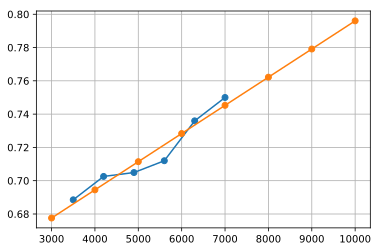

In [43]:
plt.plot(x, y, marker = 'o')
plt.plot(np.array(range(3000,10001,1000)).reshape(-1, 1), y_10000, marker = 'o', linestyle = '-')
plt.grid(True)

### Таким образом, с коэффициентом детерминации 0.93 можно прогнозировать, что при увеличении количества наблюдений до 10000 (т.е. до количества наблюдений в train.csv) будем иметь увеличение качества оценки по основной метрике до 0.79 - 0.80.
### Принимаем решение использовать для предсказания результат обучения выбранной модели на выборке 10000 наблюдений из df_train:

## Создание прогноза для тестового набора df_test

In [44]:
# Проверяем feats
feats

['Rooms',
 'D_5',
 'Square',
 'D_10',
 'HouseYear',
 'Social_2',
 'HF_6',
 'HY_2',
 'KitchenSquare',
 'Healthcare_1',
 'Floor',
 'Ecology_1',
 'Social_1',
 'HF_7',
 'HY_1',
 'HY_7']

In [45]:
# Добавляем дополнительные признаки к df_train
df_train['Price_m2']=(df_train['Price']/df_train['Square'])
nbin = 10
df_train['PriceGroup'] = pd.DataFrame(pd.qcut(df_train['Price_m2'], nbin, labels=range(1, nbin+1)))
# Добавляем доп. поля к полному датафрейму и тесту
for ind, key in enumerate(keys):
    df_train, df_test = PivotMerge4key(key, key_prefix[ind], nbin, df_train, df_test)

In [46]:
df_train.shape, df_test.shape

((10000, 55), (5000, 52))

In [47]:
# - все правильно на три поля меньше - Price, Price_m2, PriceGroup

In [48]:
model = RF(n_estimators=176, max_depth=17, random_state=70)

In [49]:
model.fit(df_train[feats], df_train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=176, n_jobs=None,
           oob_score=False, random_state=70, verbose=0, warm_start=False)

In [50]:
df_test['Price'] = model.predict(df_test.loc[:, feats])

In [51]:
df_test.loc[:, ['Id', 'Price']].to_csv('VGrishin_predictions.csv', index=None)

In [52]:
print(datetime.datetime.now())

2019-03-21 21:37:38.349021
